# __Titanic dataset exploratory analysis__

##### With this project, I want to learn data analysis approaches using Python and special libraries such as:
* Pandas
* Seaborn
* Matplotlib.pyplot


##### There won't be any specific questions I want to ask this data before getting started. I will explore as many questions as I can during the process. Some of the research may be redundant and not practically useful for a real-case data analysis. However, primarily, this project focuses on working with data visualization tools. Throughout the process, I will enhance my ability to understand and work with data in Python.


### Part #1: Cleansing Data

#### __Let's start by importing libraries__

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### __Next, we want to import our file using Pandas__
* We'll see what we've imported using ".head()" function

In [2]:
titanic = pd.read_csv('Titanic.csv')

titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


#### __Also, we want to check the types of data__
* We've found some inconsistencies within this dataset using ".info()" function
* Columns 'Age', 'Cabin', 'Embarked' definitely have NA values

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### __We can try dropping all NA values and see what is left__
* We see that we lost ~79.5% of the data, so we need to modify our code chunk

In [4]:
titanic.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


#### __This time, we will attempt to exclude NA values from the "Age" and the "Embarked" columns__
* We see that we lost ~20% of data from all other columns except the "Cabin" column, where we lost only ~10% of the data

In [5]:
titanic.dropna(subset=['Age','Embarked']).info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


#### __Let's create our first bar chart to visualize the difference between the original data and the one with dropped NA values from the "Age" and the "Embarked" columns__
* I couldn't find the proper way to place two bar charts next to each other, so I added labels to each bar by adapting code from [here](https://stackoverflow.com/questions/55586912/seaborn-catplot-set-values-over-the-bars)

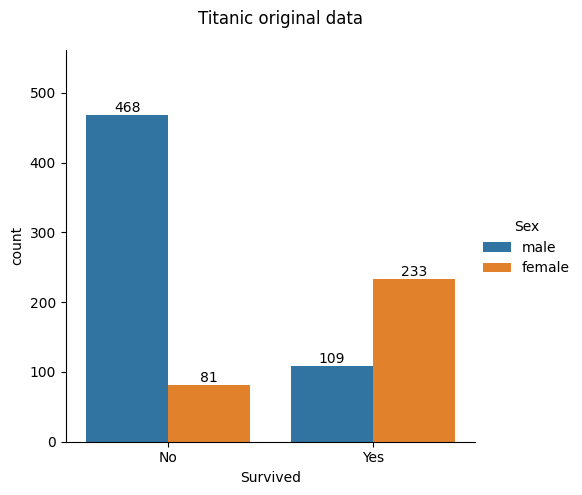

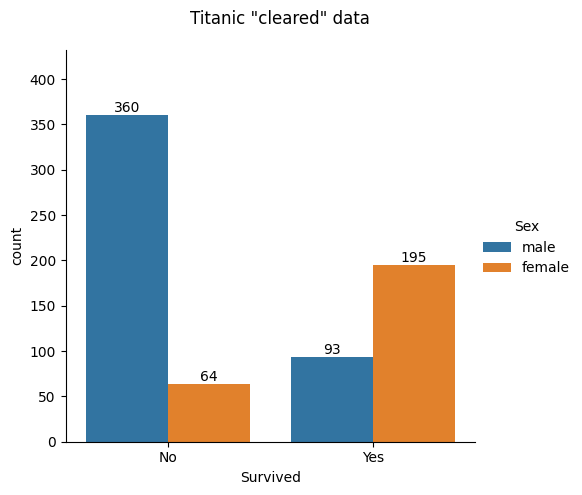

In [6]:
titanic_c = titanic.dropna(subset=['Age','Embarked'])

titanic.loc[:, 'Survived'] = titanic['Survived'].map({0:'No', 1:'Yes'})
titanic_c.loc[:, 'Survived'] = titanic_c['Survived'].map({0:'No', 1:'Yes'})

g1 = sns.catplot(x = 'Survived', data = titanic, kind = 'count', hue = titanic['Sex'], legend = True)
# iterate through axes (taken from the internet)
for ax in g1.axes.ravel():
    
    # add annotations (taken from the internet)
    for c in ax.containers:
        labels = [f'{(v.get_height()):.0f}' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)

g1.fig.subplots_adjust(top=0.9)
g1.fig.suptitle('Titanic original data')

g2 = sns.catplot(x = 'Survived', data = titanic_c, kind = 'count', hue = titanic_c['Sex'])
# iterate through axes (taken from the internet)
for ax in g2.axes.ravel():
    
    # add annotations (taken from the internet)
    for c in ax.containers:
        labels = [f'{(v.get_height()):.0f}' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)

g2.fig.subplots_adjust(top=0.9)
g2.fig.suptitle('Titanic "cleared" data')

plt.show()

#### __Acceptable data loss (if NA) around 20% so here's our losses:__
* Male Survived: Yes ~15%, No ~23%
* Female Survived: Yes ~16%, No ~21%

#### __As we can see, we're good with the data loss percentage and can use "cleared" version of Titanic dataset for the next studies__